
# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Data visualization: design and implementation practice
Week 12 | Exercise 1.0



## Introduction

In this folder are five CSVs, each with data on a single customer of a cellular phone plan.$^*$

Some non-obvious feature names are:
- vc = voice call
- rc_amount = amount recharged
- offerAmount = minimum recharge amount to qualify for special marketing offer

And here are some [helpful reminders](https://cdn2.hubspot.net/hub/53/file-863940581-pdf/Data_Visualization_101_How_to_Design_Charts_and_Graphs.pdf) of best practice for basic visualizations. (Except they call choropleths "heat maps"...)

$^*$ This is sourced from an online contest.

## Challenge

Visualize this! You may use any tool you want, although Python + visualization libraries are encouraged.

Think about:

- What information you want to represent
- Who would use this information, and how
- Making this presentation tidy and intuitive
- What would happen if you had lots more data of the same format
- What would happen if your client had more data of a slightly different format

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

%matplotlib inline

# Balance

In [77]:
balance = pd.read_csv('balance.csv')
balance.head(2)

,timestamp,balance
0,2013-05-01 05:00:01,28.559999
1,2013-05-02 05:00:01,23.209999


In [78]:
balance.shape

(218, 2)

In [79]:
# COnverting to datetime format

balance.loc[:,'timestamp'] = pd.DatetimeIndex(balance['timestamp'])

In [80]:
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
timestamp    218 non-null datetime64[ns]
balance      218 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [81]:
balance['year'] = pd.DatetimeIndex(balance['timestamp']).year

In [82]:
balance['month'] = pd.DatetimeIndex(balance['timestamp']).month

In [83]:
balance.describe()

,balance,year,month
count,218.000000,218.0,218.000000
mean,19.694174,2013.0,7.495413
std,17.692822,0.0,1.524751
min,0.000000,2013.0,5.000000
25%,2.227500,2013.0,6.000000
50%,17.510000,2013.0,8.000000
75%,31.275001,2013.0,9.000000
max,64.050003,2013.0,10.000000


## Monthly average balance

In [88]:
# Pivoting by month

balance_month = pd.pivot_table(balance, index = 'month', values = 'balance')
balance_month.head()

month
5    22.905000
6    17.038571
7    21.343334
8    16.951778
9    21.661667
Name: balance, dtype: float64

# Filled

In [3]:
filled = pd.read_csv('filled.csv')
filled.head(2)

,timestamp,rc_amount,offerUnits,offerAmount,qualifying_rc_date,adjustment_date,days_to_adjust,expiryDate
0,2013-06-14 05:48:16,30.0,credit,8.0,2013-06-14 18:53:32,2013-06-20 12:20:21,5,2013-06-19 05:48:16
1,2013-06-20 07:11:31,50.0,credit,15.0,2013-06-20 19:18:46,2013-06-30 13:52:36,9,2013-06-25 07:11:31


In [8]:
filled.shape

(6, 8)

In [92]:
filled['timestamp'] = pd.DatetimeIndex(filled['timestamp'])
filled['year'] = filled['timestamp'].dt.year
filled['month'] = filled['timestamp'].dt.month
filled['day_of_week'] = filled['timestamp'].dt.dayofweek
filled['hour'] = filled['timestamp'].dt.hour

In [94]:
filled

,timestamp,rc_amount,offerUnits,offerAmount,qualifying_rc_date,adjustment_date,days_to_adjust,expiryDate,year,month,day_of_week,hour
0,2013-06-14 05:48:16,30.0,credit,8.0,2013-06-14 18:53:32,2013-06-20 12:20:21,5,2013-06-19 05:48:16,2013,6,4,5
1,2013-06-20 07:11:31,50.0,credit,15.0,2013-06-20 19:18:46,2013-06-30 13:52:36,9,2013-06-25 07:11:31,2013,6,3,7
2,2013-06-27 07:19:29,20.0,credit,5.0,2013-06-27 09:24:36,2013-07-04 16:37:55,7,2013-07-12 07:19:29,2013,6,3,7
3,2013-07-15 06:09:24,20.0,credit,5.0,2013-07-15 16:03:32,2013-07-19 12:33:46,3,2013-07-30 06:09:24,2013,7,0,6
4,2013-08-19 06:21:39,50.0,sms,15.0,2013-08-19 13:53:37,2013-08-22 19:41:10,3,2013-08-24 06:21:39,2013,8,0,6
5,2013-09-21 05:52:28,30.0,sms,10.0,2013-09-23 19:32:44,2013-09-26 21:49:17,3,2013-09-26 05:52:28,2013,9,5,5


In [95]:
filled_month = pd.pivot_table(filled, values = 'rc_amount', index = 'month', aggfunc=sum)

In [96]:
filled_month

month
6    100.0
7     20.0
8     50.0
9     30.0
Name: rc_amount, dtype: float64

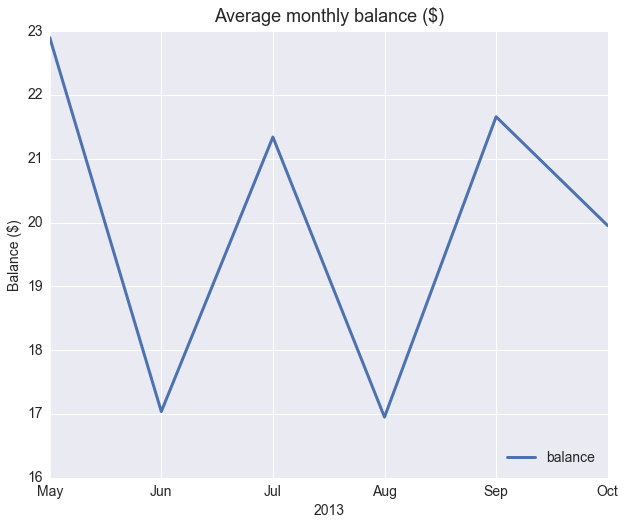

In [91]:
# Plotting monthly voicecall usage

ax = balance_month.plot(figsize = (10,8), linewidth = 3)

ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xticklabels(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.set_title('Average monthly balance ($)', y = 1.01, fontsize = 18)
ax.set_xlabel('2013', fontsize = 14)
ax.set_ylabel('Balance ($)', fontsize = 14)

ax.legend(loc = 'lower right', fontsize = 14);

# Not Filled

In [4]:
unfilled = pd.read_csv('not_filled.csv')
unfilled.head(2)

,timestamp,rc_amount,offerUnits,offerAmount,qualifying_recharge,expiryDate
0,2013-08-01 05:50:36,20.0,credit,5.0,True,2013-08-16 05:50:36


In [9]:
unfilled.shape

(1, 6)

# Recharge

In [5]:
recharge = pd.read_csv('recharges.csv')
recharge.head(2)

,timestamp,voucher_label,voucher_value
0,2013-05-04 00:32:16,SELLER,50.0
1,2013-05-09 02:14:26,BODCELU,20.0


In [11]:
recharge.shape

(35, 3)

In [97]:
recharge['timestamp'] = pd.DatetimeIndex(recharge['timestamp'])
recharge['month'] = recharge['timestamp'].dt.month
recharge['day_of_week'] = recharge['timestamp'].dt.dayofweek

In [104]:
recharge_vou_value = pd.pivot_table(recharge, index = 'month', values = 'voucher_value', aggfunc=sum)

In [105]:
recharge_vou_value

month
5     270.0
6     260.0
7     240.0
8     250.0
9     250.0
10    180.0
Name: voucher_value, dtype: float64

In [118]:
recharge_vou_label = pd.pivot_table(recharge, index = 'voucher_label', values = 'voucher_value', aggfunc=sum)
recharge_vou_label = recharge_vou_label.sort_values()

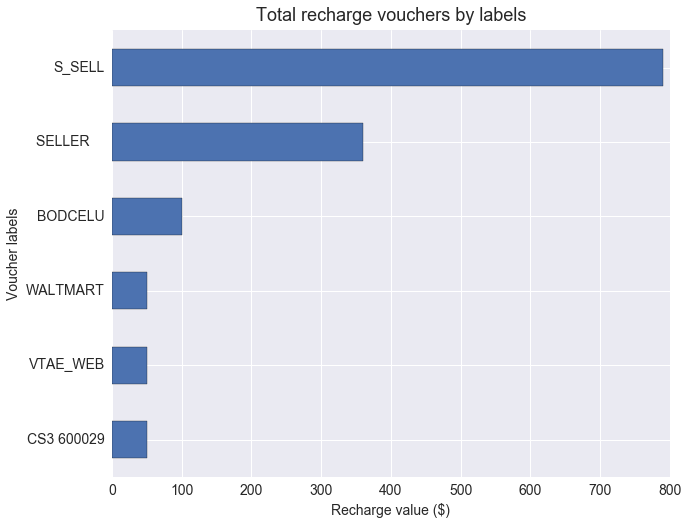

In [119]:
ax = recharge_vou_label.plot(kind = 'barh', figsize = (10,8))

ax.tick_params(axis = 'both', labelsize = 14)

ax.set_title('Total recharge vouchers by labels', y = 1.01, fontsize = 18)
ax.set_xlabel('Recharge value ($)', fontsize = 14)
ax.set_ylabel('Voucher labels', fontsize = 14)
plt.savefig('voucher_label.png');

# Usage

In [30]:
usage = pd.read_csv('usage.csv')
usage.head(2)

,timestamp,inbound_sms_count,inbound_vc_minutes,outbound_sms_count,outbound_vc_minutes,in_network_inbound_sms_count,out_of_network_inbound_sms_count,in_network_outbound_sms_count,out_of_network_outbound_sms_count,in_network_inbound_vc_minutes,out_of_network_inbound_vc_minutes,in_network_outbound_vc_minutes,out_of_network_outbound_vc_minutes
0,2013-03-31,0,5.050000,0.0,0.700000,0,0,0,0.0,4,1.050000,0,0.700000
1,2013-04-01,0,4.583333,0.0,0.666667,0,0,0,0.0,4,0.583333,0,0.666667


In [31]:
usage.shape

(191, 13)

In [32]:
usage.loc[:,'timestamp'] = pd.DatetimeIndex(usage['timestamp'])

In [37]:
usage['year'] = usage['timestamp'].dt.year
usage['month'] = usage['timestamp'].dt.month
usage['day_of_week'] = usage['timestamp'].dt.dayofweek

In [38]:
usage.head(1)

,timestamp,inbound_sms_count,inbound_vc_minutes,outbound_sms_count,outbound_vc_minutes,in_network_inbound_sms_count,out_of_network_inbound_sms_count,in_network_outbound_sms_count,out_of_network_outbound_sms_count,in_network_inbound_vc_minutes,out_of_network_inbound_vc_minutes,in_network_outbound_vc_minutes,out_of_network_outbound_vc_minutes,year,month,day_of_week
0,2013-03-31,0,5.05,0.0,0.7,0,0,0,0.0,4,1.05,0,0.7,2013,3,6


In [39]:
usage['total_sms'] = usage['inbound_sms_count'] + usage['outbound_sms_count']

In [40]:
usage['total_vc'] = usage['inbound_vc_minutes'] + usage['outbound_vc_minutes']

In [41]:
# Only 2013, so we will delete this column

usage['year'].value_counts()

2013    191
Name: year, dtype: int64

In [42]:
usage['month'].value_counts()

8     31
9     30
7     30
5     30
6     29
4     29
10    11
3      1
Name: month, dtype: int64

## Voicecalls Usage

In [60]:
# Monthly voice call usage

vc_usage = pd.pivot_table(usage, values = ['total_vc', 'inbound_vc_minutes', 'outbound_vc_minutes'], index = ['month'])
vc_usage.columns = ['inbound_voicecalls', 'outbound_voicecalls', 'total_voicecalls']

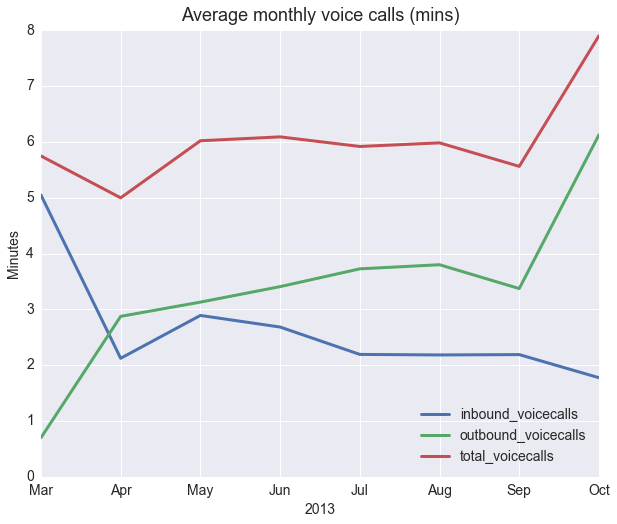

In [121]:
# Plotting monthly voicecall usage

ax = vc_usage.plot(figsize = (10,8), linewidth = 3)

ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xticklabels(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.set_title('Average monthly voice calls (mins)', y = 1.01, fontsize = 18)
ax.set_xlabel('2013', fontsize = 14)
ax.set_ylabel('Minutes', fontsize = 14)

ax.legend(loc = 'lower right', fontsize = 14)
plt.savefig('avg_month_voice.png');

### Voicecall usage by day of week

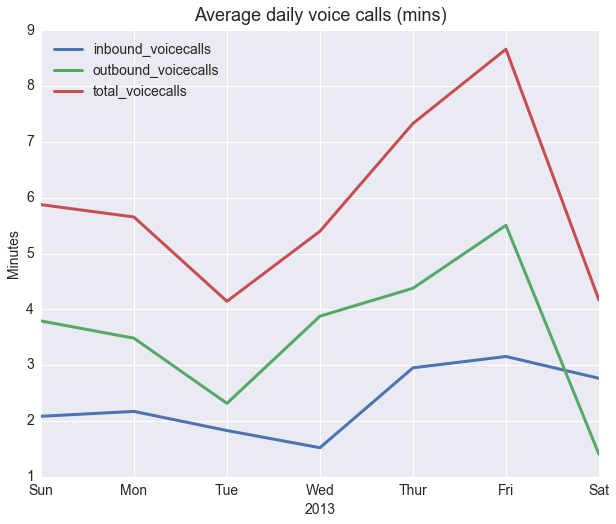

In [122]:
# Day of week voice call usage

vc_day_usage = pd.pivot_table(usage, values = ['total_vc', 'inbound_vc_minutes', 'outbound_vc_minutes'], index = ['day_of_week'])
vc_day_usage.columns = ['inbound_voicecalls', 'outbound_voicecalls', 'total_voicecalls']

# Plotting day of week voicecall usage

ax = vc_day_usage.plot(figsize = (10,8), linewidth = 3)

ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])

ax.set_title('Average daily voice calls (mins)', y = 1.01, fontsize = 18)
ax.set_xlabel('2013', fontsize = 14)
ax.set_ylabel('Minutes', fontsize = 14)

ax.legend(loc = 'upper left', fontsize = 14)
plt.savefig('avg_daily_voice.png');

## SMS Usage

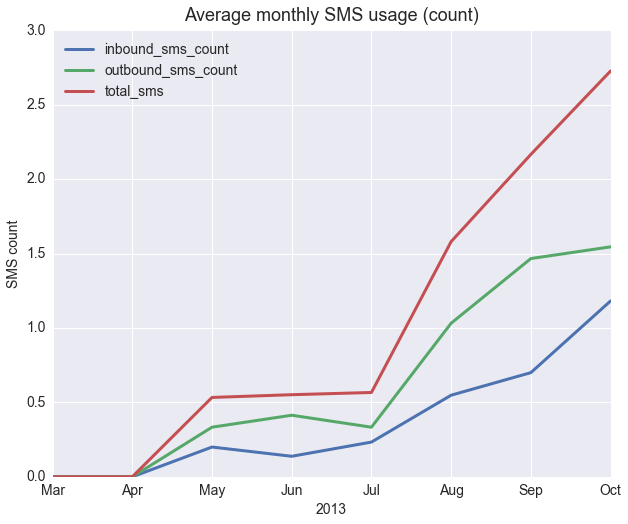

In [123]:
sms_usage = pd.pivot_table(usage, values = ['total_sms', 'inbound_sms_count', 'outbound_sms_count'], index = ['month'])

ax = sms_usage.plot(figsize = (10,8), linewidth = 3)

ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xticklabels(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.set_title('Average monthly SMS usage (count)', y = 1.01, fontsize = 18)
ax.set_xlabel('2013', fontsize = 14)
ax.set_ylabel('SMS count', fontsize = 14)

ax.legend(loc = 'upper left', fontsize = 14)
plt.savefig('avg_monthly_sms.png');

## SMS usage by day of week

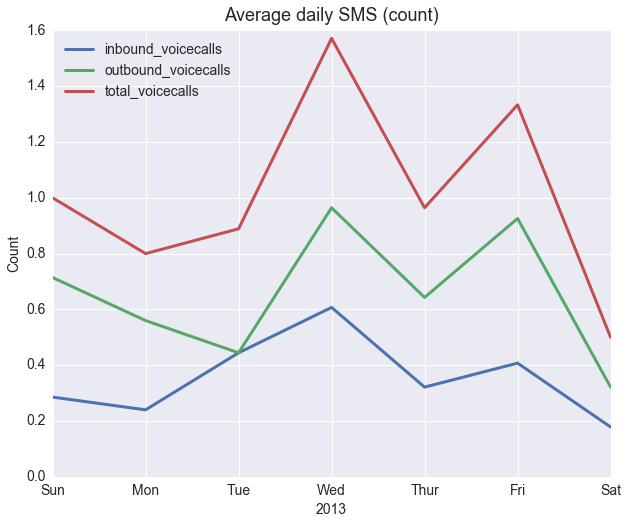

In [124]:
# Day of week sms usage

vc_day_usage = pd.pivot_table(usage, values = ['total_sms', 'inbound_sms_count', 'outbound_sms_count'], index = ['day_of_week'])
vc_day_usage.columns = ['inbound_voicecalls', 'outbound_voicecalls', 'total_voicecalls']

# Plotting day of week voicecall usage

ax = vc_day_usage.plot(figsize = (10,8), linewidth = 3)

ax.tick_params(axis = 'both', labelsize = 14)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])

ax.set_title('Average daily SMS (count)', y = 1.01, fontsize = 18)
ax.set_xlabel('2013', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

ax.legend(loc = 'upper left', fontsize = 14)
plt.savefig('avg_daily_sms.png');

# Other plots to consider

- Average monthly balance vs average weekly balance (bars for weekly, line for monthly)
- Adding std to monthly usages
- Cummulative plots? (Total usage over a period of time, 6 monthly?)
- Use subplots to group similar charts (Daily usage of sms and vc)
- Add marketing offers onto plots to show effects of marketing